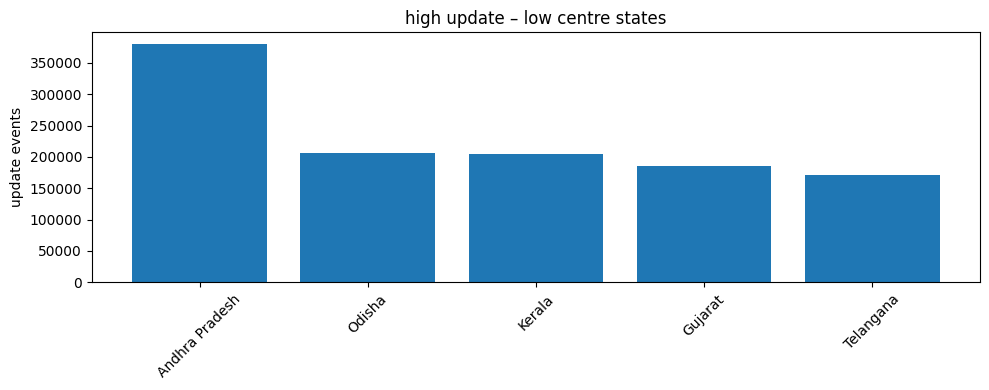

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


demo=pd.read_parquet("../sql/data/data_cache/demographic_clean.parquet")
bio=pd.read_parquet("../sql/data/data_cache/biometric_clean.parquet")

updates=(
    pd.concat([demo,bio])
    .groupby("state")
    .size()
    .reset_index(name="total_updates")
)

centres=pd.read_csv("../sql/data/Aadhar.csv")
centres=centres.rename(columns={
    "State":"state",
    "No. of centres":"centres"
})
centres["centres"]=pd.to_numeric(centres["centres"],errors="coerce")


df=updates.merge(centres,on="state",how="inner")


df=df.sort_values("total_updates",ascending=False).head(10)


df=df.sort_values("centres").head(len(df)//2)

# final sort for display
df=df.sort_values("total_updates",ascending=False)


plt.figure(figsize=(10,4))
plt.bar(df["state"],df["total_updates"])
plt.xticks(rotation=45)
plt.ylabel("update events")
plt.title("high update – low centre states")
plt.tight_layout()
plt.show()
